In [55]:
# variable that will be used on visualization
FREQ = 35

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KernelDensity

The used dataset is about "Vehicle Sales and Market Trends Dataset" provides a comprehensive collection of information pertaining to the sales transactions of various vehicles. This dataset encompasses details such as the year, make, model, trim, body type, transmission type, VIN (Vehicle Identification Number), state of registration, condition rating, odometer reading, exterior and interior colors, seller information, Manheim Market Report (MMR) values, selling prices, and sale dates.

In [57]:
df = pd.read_csv('carListings/archive/car_prices.csv')

# Exploratory Data Analysis

While skimming through the data, I noticed that the transmission column has two values, 'sedan' and 'Sedan,' categorized as two different variables; thus, the value 'sedan' is replaced with 'sedan.'

In [58]:
df['transmission'] = df['transmission'].replace('Sedan', 'sedan')

The feature 'vin' represents a unique vehicle identification value, which is unnecessary.         

In [59]:
df = df.drop('vin', axis='columns')

The code cells below show the shape of the dataset and general information on the stored data.

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   state         558837 non-null  object 
 7   condition     547017 non-null  float64
 8   odometer      558743 non-null  float64
 9   color         558088 non-null  object 
 10  interior      558088 non-null  object 
 11  seller        558837 non-null  object 
 12  mmr           558799 non-null  float64
 13  sellingprice  558825 non-null  float64
 14  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(10)
memory usage: 64.0+ MB


In [61]:
df.shape

(558837, 15)

In [62]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


From the output above, it can be seen that the features odometer, mmr and sellingprice have very high standard deviation and unlikely high maximum value, which suggests that the data has either faulty entries or extreme outliers.

The two code cells below are written to see the missing values in the dataset. The first one is for the number of missing values for each column and the second is the mean of the missing values compared to the column entries. 

In [63]:
print(df.isnull().sum())

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64


In [64]:
print(df.isnull().mean() * 100)

year             0.000000
make             1.843292
model            1.860829
trim             1.905922
body             2.361154
transmission    11.694287
state            0.000000
condition        2.115107
odometer         0.016821
color            0.134028
interior         0.134028
seller           0.000000
mmr              0.006800
sellingprice     0.002147
saledate         0.002147
dtype: float64


The given results on the dataset show that the null values do not have an abnormally high percentage therefore the dataset does not require to be pruned on the missing rows, rather they should be imputed. 

Below lines of code show the data type in each column

In [65]:
for col in df.columns:
    print(f"Column: {col}, Data Type: {df[col].dtype}")

Column: year, Data Type: int64
Column: make, Data Type: object
Column: model, Data Type: object
Column: trim, Data Type: object
Column: body, Data Type: object
Column: transmission, Data Type: object
Column: state, Data Type: object
Column: condition, Data Type: float64
Column: odometer, Data Type: float64
Column: color, Data Type: object
Column: interior, Data Type: object
Column: seller, Data Type: object
Column: mmr, Data Type: float64
Column: sellingprice, Data Type: float64
Column: saledate, Data Type: object


From the outputs above, we see that the dataset has categorical and numerical features, and both types of features have missing values.

Handling the missing values should be conducted in different ways for different types of dat

# Visual EDA

## Visualizing The Columns Without Missing Data

### Categorical Features

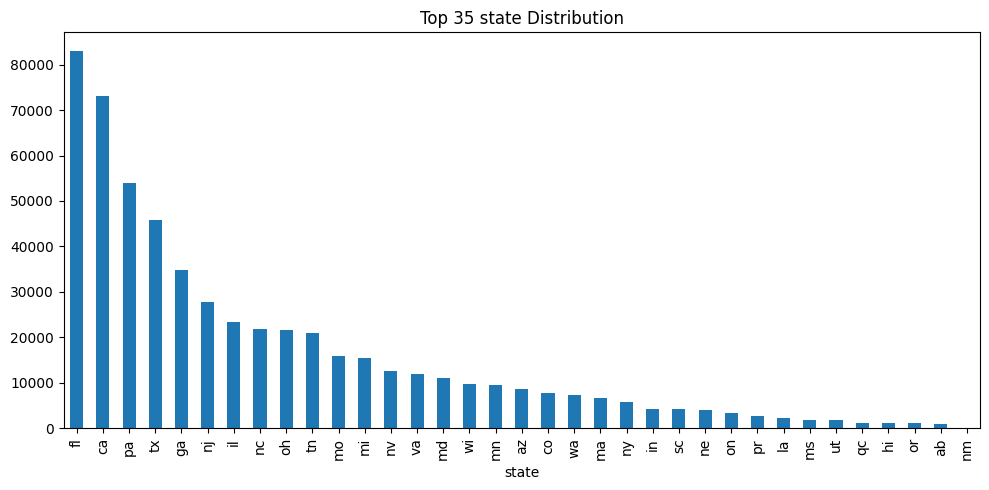

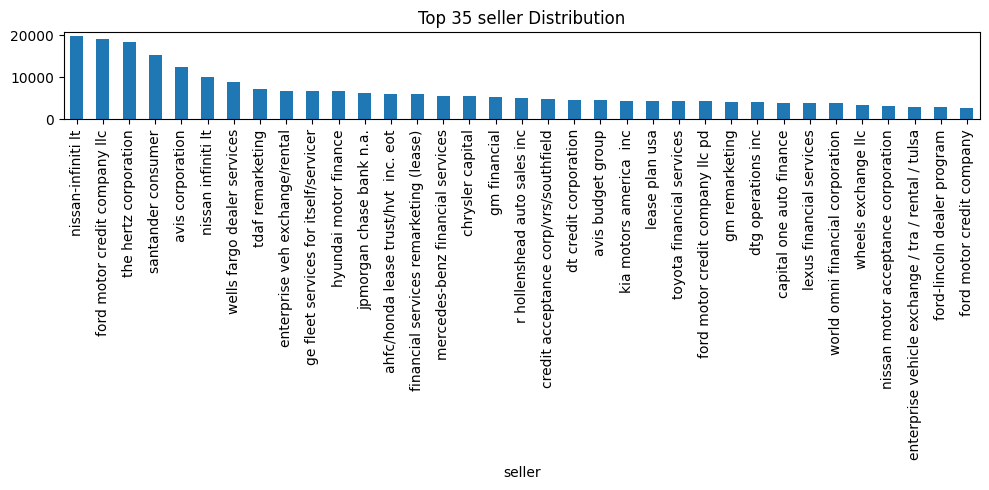

In [66]:
for col in df.columns:
    # Select columns without missing values and holding categorical data
    if not df[col].isnull().any() and df[col].dtype == 'object':
        plt.figure(figsize=(10, 5))

        value_counts = df[col].value_counts()
        if df[col].nunique() > FREQ:
            value_counts = value_counts.iloc[:FREQ]  # Keep the first 50 categories as they appear in the data
            plt.title(f'Top {FREQ} {col} Distribution')
        else:
            plt.title(f'Top {df[col].nunique()} {col} Distribution')

        # Plot the data in the original order
        value_counts.plot(kind='bar')
        plt.tight_layout()  # Prevent cut-offs
        plt.show()

### Numerical Features

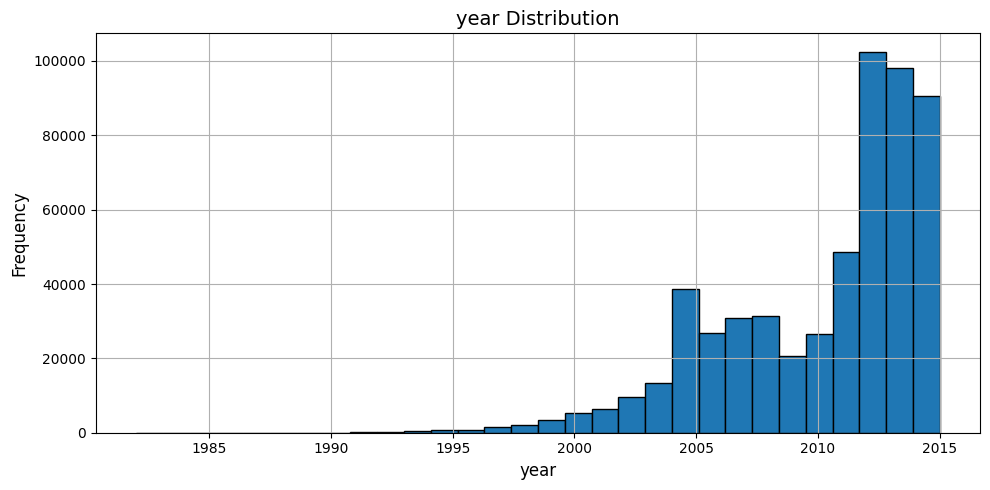

In [67]:
for col in df.columns:
    # Select all the columns that doesnt have a missing value which holds numerical variables
    if not df[col].isnull().any() and df[col].dtype != 'object':
        plt.figure(figsize=(10, 5))
        # Plot histogram with bins dynamically calculated based on data
        df[col].hist(bins=30, edgecolor='black') 

        # Adding title and labels
        plt.title(f'{col} Distribution', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)

        # Adding grid for better readability
        plt.grid(True)

        # Tight layout to prevent overlap
        plt.tight_layout()  
        plt.show()

The histogram above show that there is only one feature without missing data, which is the year feature. The graph of the year feature is negatively (left) skewed.

## Visualizing The Columns With Missing Data

### Categorical Features

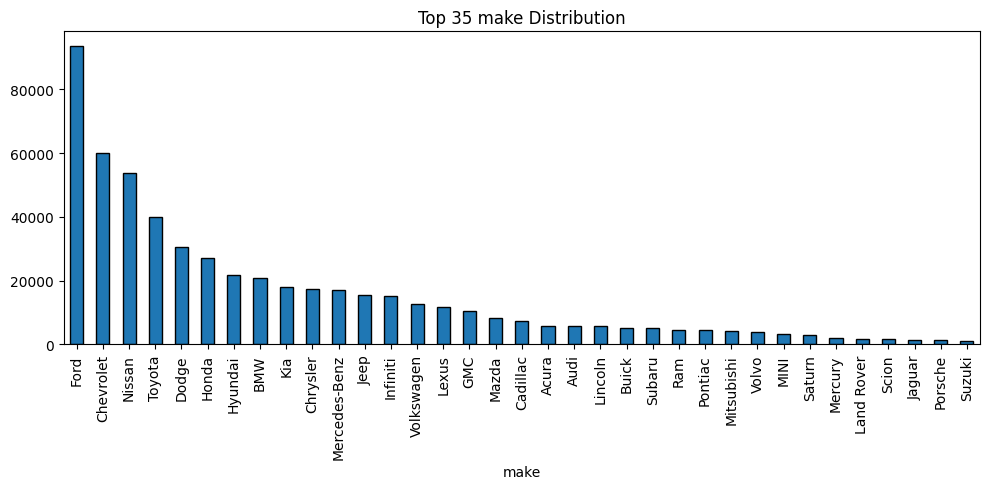

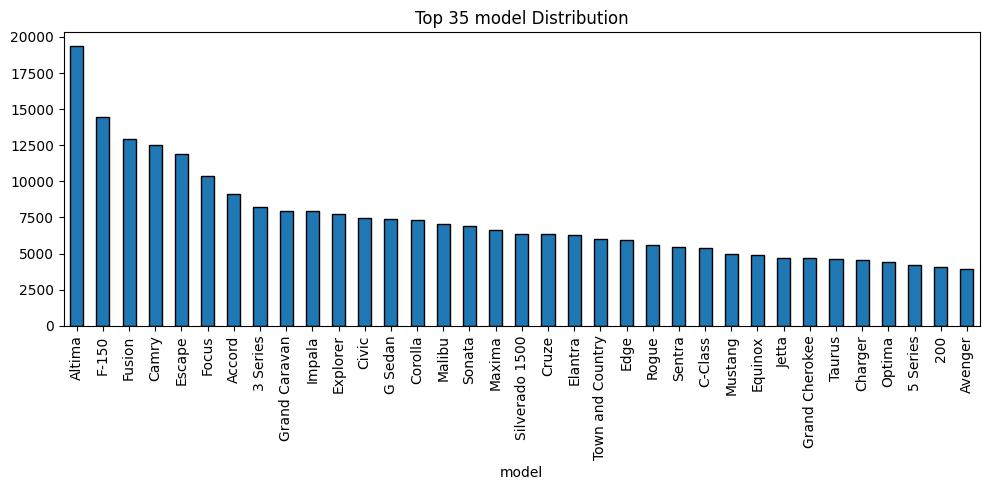

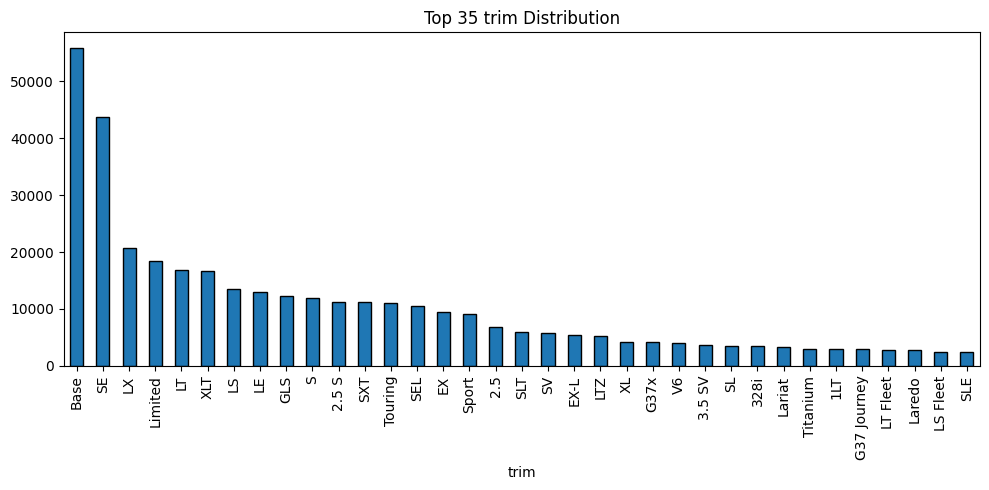

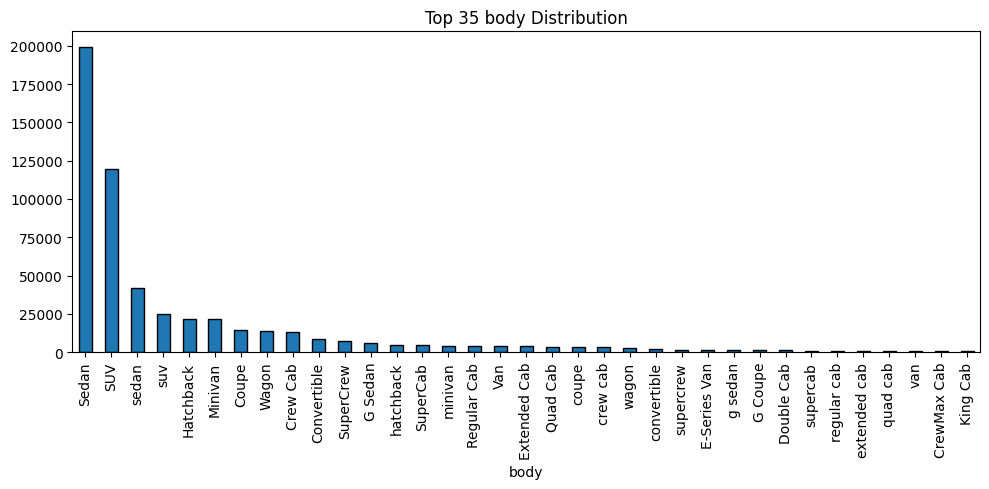

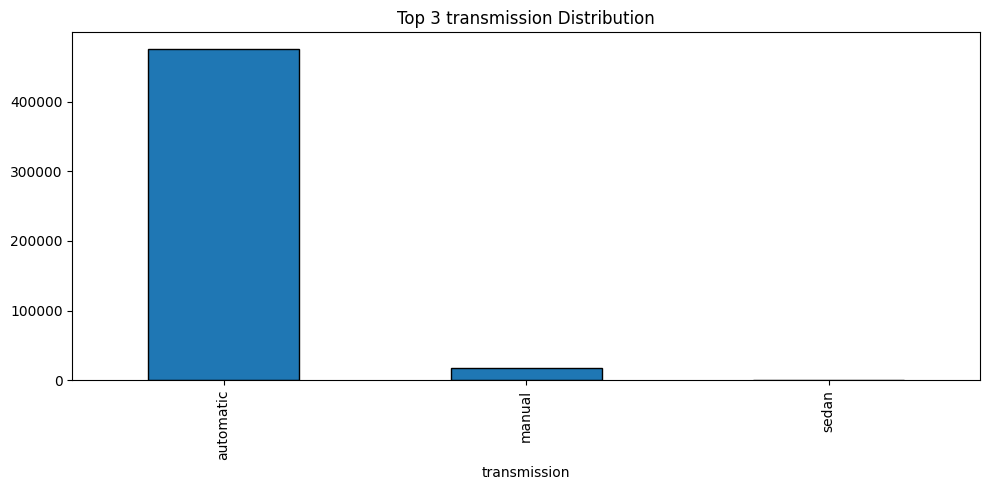

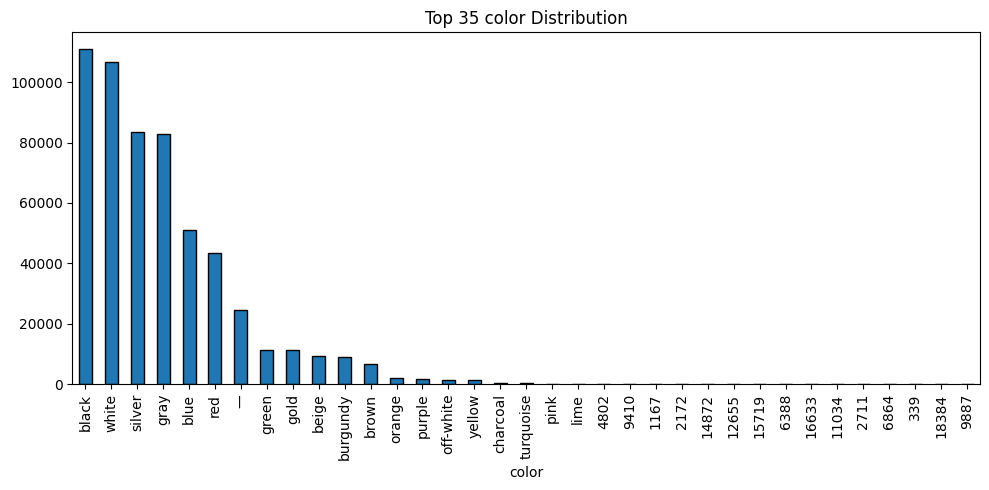

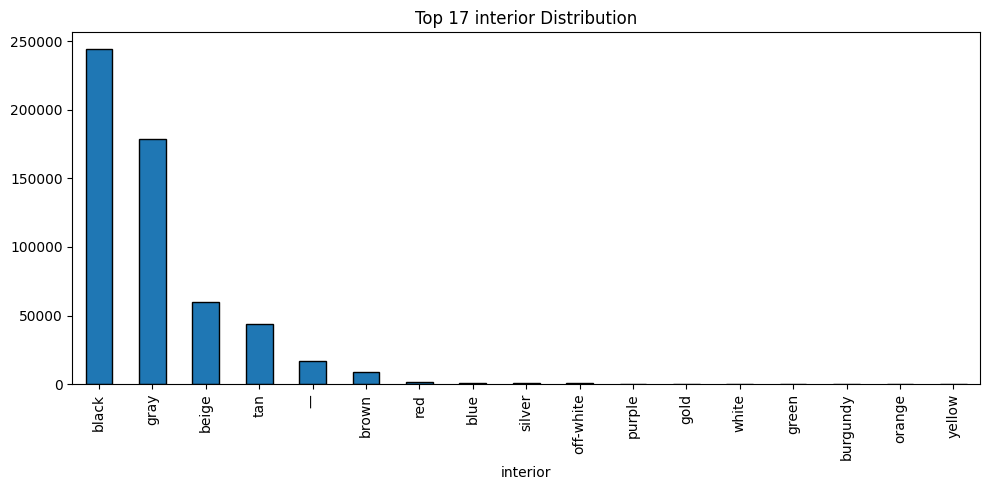

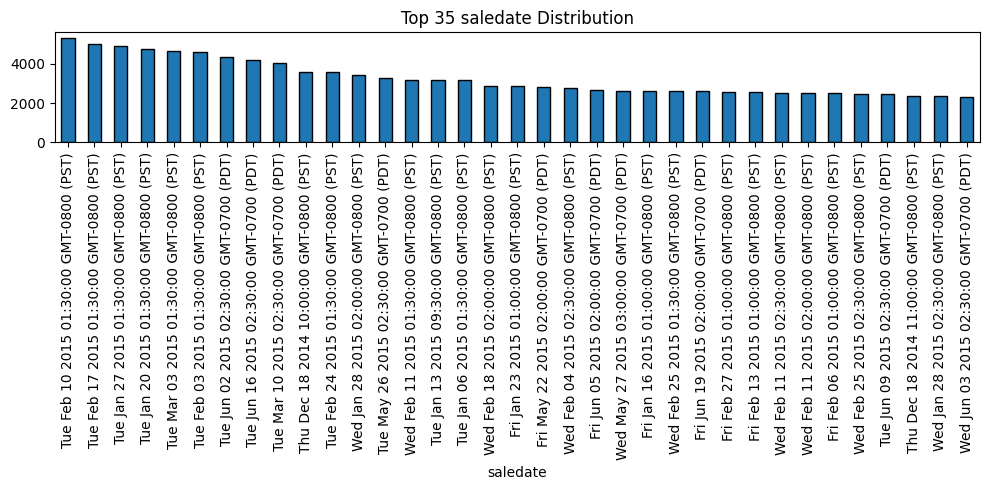

In [68]:
categorical_features_with_missing = []
for col in df.columns:
    # Select all the columns that has a missing value which holds categorical variables
    if df[col].isnull().any() and df[col].dtype == 'object':
        categorical_features_with_missing.append(col)

        plt.figure(figsize=(10, 5))

        value_counts = df[col].value_counts()
        if df[col].nunique() > FREQ:
            value_counts = value_counts.iloc[:FREQ]  # Keep the first FREQ categories as they appear in the data
            plt.title(f'Top {FREQ} {col} Distribution')
        else:
            plt.title(f'Top {df[col].nunique()} {col} Distribution')
        
        # Plot the bar chart without sorting
        value_counts.plot(kind='bar', edgecolor='black')
        plt.tight_layout()  # padding
        plt.show()

In the plots above we see the most frequent values for columns with categorical features that contain a missing value. The most frequent value, also known as mode, will be used to impute the missing values for the case of categorical features.

### Numerical Features

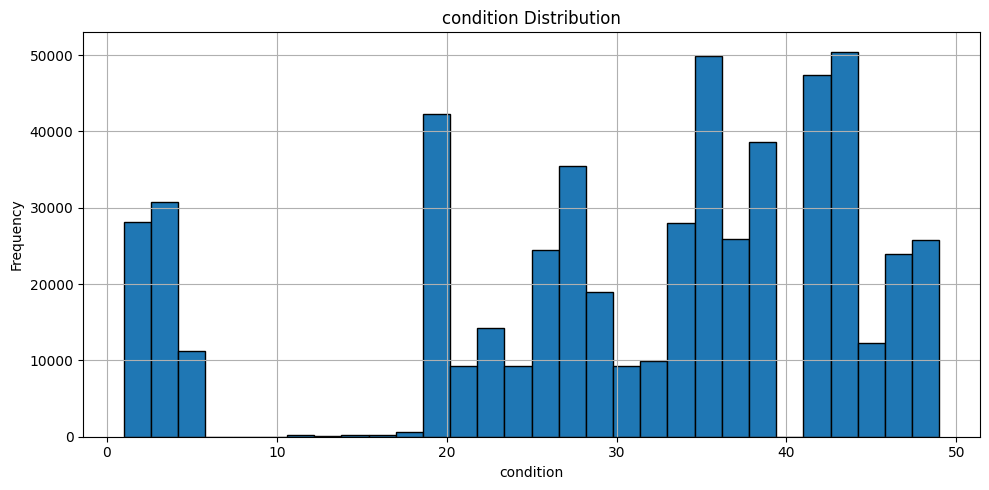

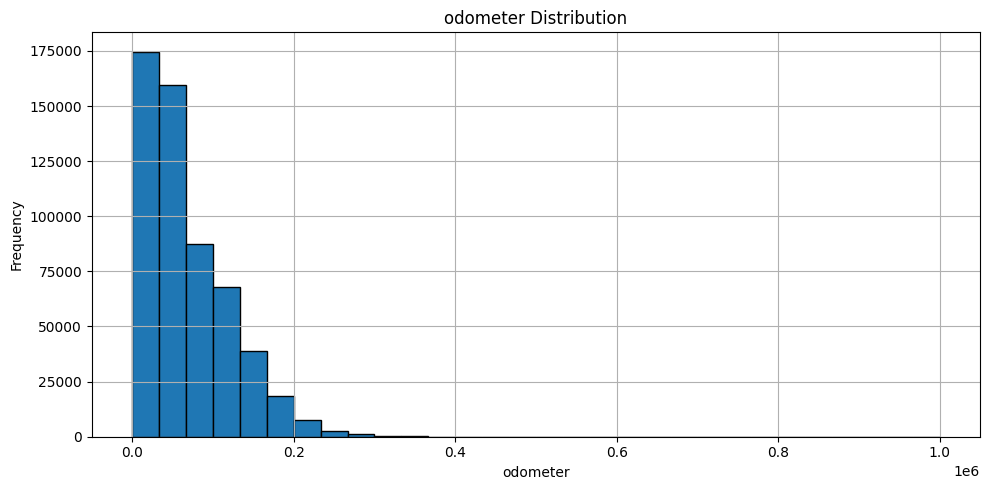

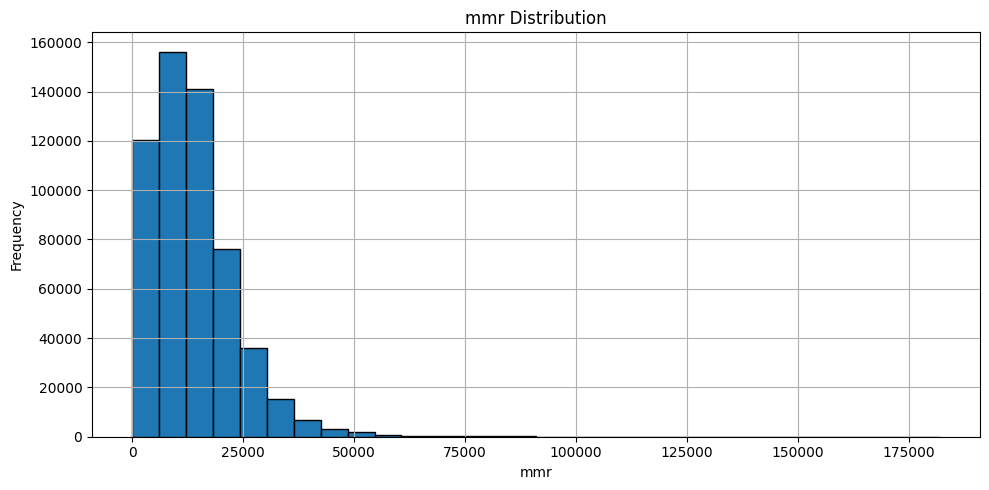

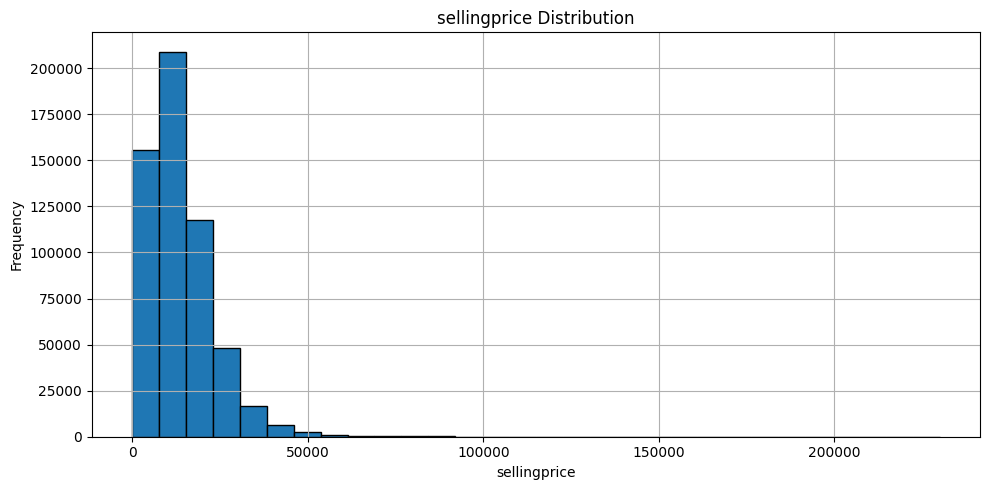

In [69]:
numeric_features_with_missing = []
for col in df.columns:
    # Select all the columns that has a missing value which holds numerical variables
    if df[col].isnull().any() and df[col].dtype != 'object':
        numeric_features_with_missing.append(col)

        plt.figure(figsize=(10, 5))
        df[col].hist(bins=30, edgecolor = 'black') 
        plt.title(f'{col} Distribution')

        plt.xlabel(col)
        plt.ylabel('Frequency')

        # Adding grid for better readability
        plt.grid(True)
        plt.tight_layout()  # Add padding
        plt.show()

The histograms above show that the numerical features with missing values are not normally distributed and except for the 'condition' feature, the remaining columns have many outliers, thus imputing them with their respective mean variable is not a good idea.

For the 'condition' feature, it can be said that the data has a multimodal distribution, the remaining features have a positively (right) skewed distribution.

# Data Preprocessing

To avoid data leakage, it is recommended that the train-test split should be performed before the preprocessing steps.
The test split should be kept unseen and should not affect the statistics on the scaling or the imputation of the missing data.

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

## Handling Mising Values

In [72]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KernelDensity

### Numerical Features

#### Condition Feature
As I previously mentioned this feature has multimodal distribution, which means the data has multiple modes therefore using the overall mode of the data could affect the ml model's performance poorly. 
To prevent poor performance I will fill in the missing values with a kernel density estimation approach.
The kernel density approach works well with multimodal distributions and preserves the original distribution of the data.

##### Impute Missing Values in the Training Set

In [73]:
# dropping the missing values and reshaping the array for the kde
condition_no_miss_train = train_df['condition'].dropna().values.reshape(-1, 1)
kde = KernelDensity(kernel='gaussian', bandwidth=0.5)
kde.fit(condition_no_miss_train)

# Count missing values in the training set
num_missing_train = np.isnan(train_df['condition']).sum()

# Generate random samples from the estimated distribution and make it a 1d array
imputed_values_train = kde.sample(num_missing_train).flatten()

# Find the missing values in the condition column and fill those with imputed data
train_df.loc[train_df['condition'].isna(), 'condition'] = imputed_values_train


##### Impute Missing Values in the Test Set

In [74]:
# dropping the missing values and reshaping the array for the kde
condition_no_miss_test = test_df['condition'].dropna().values.reshape(-1, 1)
kde = KernelDensity(kernel='gaussian', bandwidth=0.5)
kde.fit(condition_no_miss_test)

# Count missing values in the training set
num_missing_test = np.isnan(test_df['condition']).sum()

# Generate random samples from the estimated distribution and make it a 1d array
imputed_values_test = kde.sample(num_missing_test).flatten()

# Find the missing values in the condition column and fill those with imputed data
test_df.loc[test_df['condition'].isna(), 'condition'] = imputed_values_test


#### Odometer and Mmr Features
As I previously mentioned these features have a positive skewed distribution, which means it has a lot of outliers thus mean imputation works better if the distribution is normally distributed or has a Gaussian distribution, while median imputation is preferable for skewed distribution(be it right or left).

For this, I have used Simple Imputer with a median strategy.

##### Impute Missing Values in the Train Set

In [75]:
imputer_numeric = SimpleImputer(strategy='median')

# creating a new list without the already imputed column and the target
column_names = ['mmr', 'odometer']

# transforming the column
train_df[column_names] = imputer_numeric.fit_transform(train_df[column_names])

##### Impute Missing Values in the Test Set

In [76]:
imputer_numeric = SimpleImputer(strategy='median')

# creating a new list without the already imputed column and the target
column_names = ['mmr', 'odometer']

# transforming the column
test_df[column_names] = imputer_numeric.fit_transform(test_df[column_names])

### Categorical Features
For the missing values in the categorical data, I will use the mode, the most frequent, value of each feature.

The simple imputer from sklearn with mode strategy will do this.


#### Selling Price Feature
The selling price feature will most likely be the target feature, thus imputing the missing values in this feature should be avoided, for this process can introduce bias. The imputed values might not accurately reflect the true distribution of the target variable, leading to skewed predictions.

In [77]:
print(df['sellingprice'].isnull().sum())
print(df['sellingprice'].isnull().mean() * 100)

12
0.0021473166594194733


The code output above, which was included in the findings of the data exploration phase, suggests that the missing values of the selling price column are as small as %0.002 that it would make very little difference is those columns were dropped.

In [78]:
train_df = train_df.loc[train_df['sellingprice'].notnull()]
test_df = test_df.loc[test_df['sellingprice'].notnull()]

#### Impute Missing Values in the Training Set

In [79]:
imputer_categorical = SimpleImputer(strategy='most_frequent')       

train_df[categorical_features_with_missing] = imputer_categorical.fit_transform(train_df[categorical_features_with_missing])

#### Impute Missing Values in the Test Set

In [80]:
imputer_categorical = SimpleImputer(strategy='most_frequent')       

test_df[categorical_features_with_missing] = imputer_categorical.fit_transform(test_df[categorical_features_with_missing])

## Encoding

In [81]:
for col in df.columns:
    if df[col].dtype == object:
        print(f"Column: {col}, Data Type: {df[col].nunique()}")

Column: make, Data Type: 96
Column: model, Data Type: 973
Column: trim, Data Type: 1963
Column: body, Data Type: 87
Column: transmission, Data Type: 3
Column: state, Data Type: 64
Column: color, Data Type: 46
Column: interior, Data Type: 17
Column: seller, Data Type: 14263
Column: saledate, Data Type: 3766


The encoding technique should be addressed with categorical features, from the calculated output it can be said that since most features have many unique values using one hot encoding would be very computationally expensive and label encoding would be a bit complicated for human understanding. With the lesser of the two evils approach, I will be using label encoding.

In [82]:
from sklearn import preprocessing

### Encoding the Train Set

In [83]:
# Create a label encoder object
label_encoder = preprocessing.LabelEncoder()

# encode each column 
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        train_df[col] = label_encoder.fit_transform(train_df[col])

print(train_df.head())

        year  make  model  trim  body  transmission  state  condition  \
64000   2011    20    297   755    19             0     23       45.0   
74512   2012     7    690   924    36             0     46       47.0   
207025  2013    35     70   108    37             0     46       36.0   
212615  2008    15    753  1205    36             0     50       33.0   
114910  2010    31    443  1713    37             0     47       19.0   

        odometer  color  interior  seller      mmr  sellingprice  saledate  
64000    25374.0     37         1    8209  20800.0       19000.0      1763  
74512    38759.0     32         1    5017  17900.0       19000.0       192  
207025   35179.0     19         1    8239  13450.0       12500.0       252  
212615   79716.0     33         1   11004  19550.0       19500.0      3063  
114910   44314.0     20         1    8632   8800.0        5700.0      1147  


### Encoding the Test Set

In [84]:
# Create a label encoder object
label_encoder = preprocessing.LabelEncoder()

# encode each column 
for col in test_df.columns:
    if test_df[col].dtype == 'object':
        test_df[col] = label_encoder.fit_transform(test_df[col])

print(test_df.head())

        year  make  model  trim  body  transmission  state  condition  \
311497  2014     7    340   850    35             0     13        4.0   
171592  2003    10    523  1129    32             0     23       31.0   
55288   2007    39    287   747     8             0     27       34.0   
190760  2011    49    172   821    35             0     13       43.0   
180999  2012    27    202   465    35             0     36       35.0   

        odometer  color  interior  seller      mmr  sellingprice  saledate  
311497   21507.0     25         1    3591  13450.0       13800.0       425  
171592   79712.0     27         1    8003   6025.0        6300.0      1737  
55288    65698.0     22         1    1657   7375.0        8000.0      2497  
190760   23634.0      9         0    8957  10800.0       11400.0      1761  
180999   26483.0      9         3    5415  22500.0       23300.0       217  


## Normalization

In the data exploration phase, it was obtained that the mmr, odometer, and selling price features are positively skewed and had a high standard deviation thus had outliers.
Therefore the values need to be adjusted to a common scale to prevent poor predictions caused by the dominance of the large values.

By using normalization the data will be scaled without distorting differences in ranges or losing information.
Since the data is highly skewed, square root transformation is preferred.

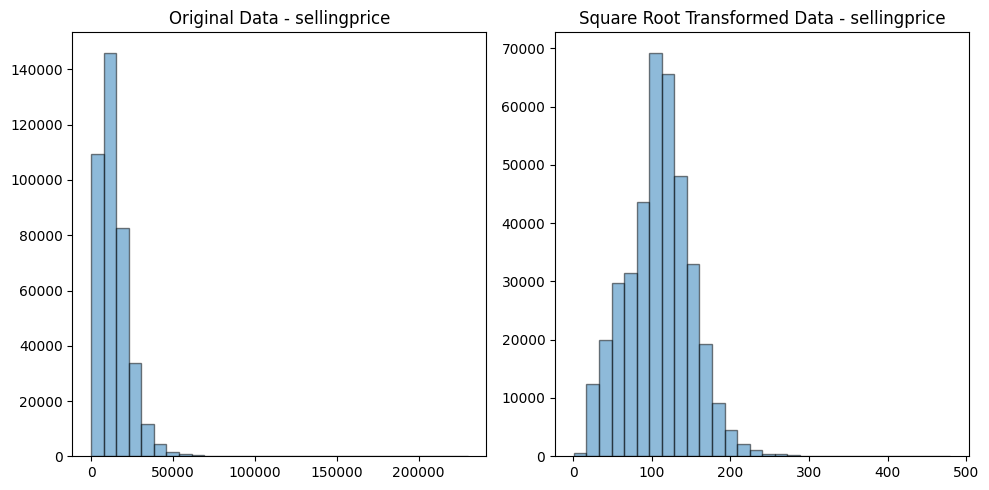

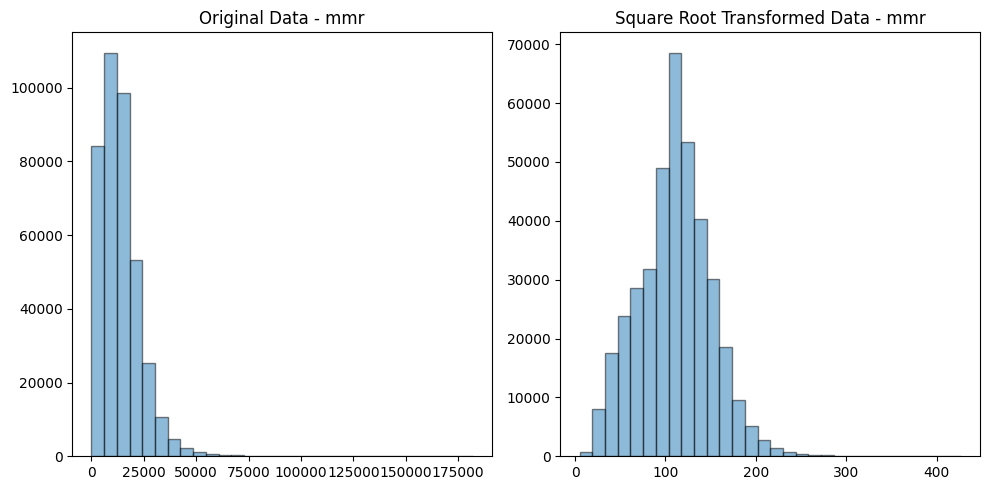

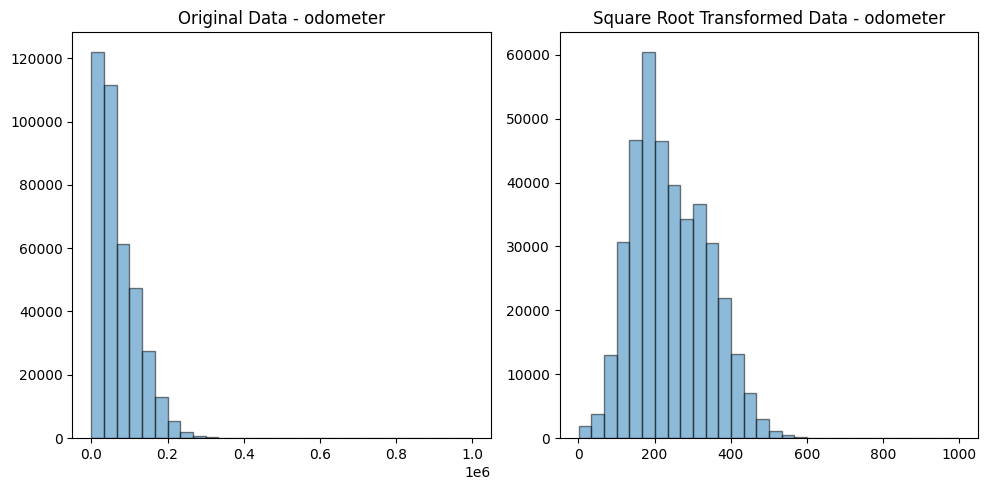

In [85]:
features_to_normalize = ['sellingprice', 'mmr', 'odometer']

# square root transformation and visualizations of before and after plots
for feature in features_to_normalize:
    #define grid of plots
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

    # square root transformation
    train_df[feature + '_sqrt'] = np.sqrt(train_df[feature])
    test_df[feature + '_sqrt'] = np.sqrt(test_df[feature])

    #create histograms
    axs[0].hist(train_df[feature], bins=30, alpha=0.5, edgecolor='black', label=feature)

    axs[1].hist(train_df[feature + '_sqrt'], bins=30, alpha=0.5, edgecolor='black', label=feature + ' (_sqrt)')

    #add title to each histogram
    axs[0].set_title(f'Original Data - {feature}')
    axs[1].set_title(f'Square Root Transformed Data - {feature}')

    # Show the plots
    plt.tight_layout()

plt.show()


The difference in distribution can be seen on the graphs located on the right side of the page. The new data is normally distributed.

## Train Test Split

In [86]:
y = df['sellingprice'].values #hedef değişkeni
X = df.drop('sellingprice', axis=1).values #tahminleyici değişkenler

y_train = train_df['sellingprice'].values 
X_train = train_df.drop('sellingprice', axis=1).values 

y_test = test_df['sellingprice'].values 
X_test = test_df.drop('sellingprice', axis=1).values 

# Supervised Learning

For supervised learning algorithms, since the target variable selling price is a continuous variable, the models used belong to the regression prediction.   

## Multiple Linear Regression

Multiple Linear Regression is an extension of Simple Linear regression as it takes more than one predictor variable to predict the response variable. 
It uses two or more independent variables to predict a dependent variable by fitting the best linear relationship.

In [87]:
from sklearn.linear_model import LinearRegression

In [88]:
# applying the model
mult_r_model = LinearRegression()  
mult_r_model.fit(X_train, y_train)

LinearRegression()

In [89]:
# Predict result
y_pred_mult_r_model = mult_r_model.predict(X_test)

## Ridge Regression

Ridge Regression is a type of Linear Regression in which the regularization term is added as a parameter. This regularization term is also known as L2 regularization. This is done to avoid overfitting.

In [90]:
from sklearn.linear_model import Ridge

In [91]:
ridge_r_model = Ridge(alpha = 0.01)
ridge_r_model.fit(X_train, y_train)

Ridge(alpha=0.01)

In [92]:
y_pred_ridge_r_model = ridge_r_model.predict(X_test)

## Lasso Regression


Lasso regression, or the Least Absolute Shrinkage and Selection Operator, is also a modification of linear regression, with a different loss function.

In [93]:
from sklearn.linear_model import Lasso

In [94]:
lasso_r_model = Lasso(alpha = 0.01)
lasso_r_model.fit(X_train, y_train)

Lasso(alpha=0.01)

In [95]:
y_pred_lasso_r_model = lasso_r_model.predict(X_test)

## Decision Tree Regression


Decision tree regression is a machine learning technique that constructs a tree-like model to predict continuous numerical values.

In [96]:
from sklearn.tree import DecisionTreeRegressor

In [97]:
tree_r_model = DecisionTreeRegressor()
tree_r_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [98]:
y_pred_tree_r_model = tree_r_model.predict(X_test)

## K-Nearest Neighbors Regression

KNN regression is a non-parametric method used for predicting continuous values. The core idea is to predict the target value for a new data point by averaging the target values of the K nearest neighbors in the feature space.

In [99]:
from sklearn.neighbors import KNeighborsRegressor

In [100]:
knn_r_model = KNeighborsRegressor()
knn_r_model.fit(X_train, y_train)

KNeighborsRegressor()

In [101]:
y_pred_knn_r_model = knn_r_model.predict(X_test)

## Cross Validation

Cross validation is useful for estimating how well a model is able to predict future observations.
The cross validation technique preferred for comparing the regression models is k-fold cross, which works well with large datasets and due to its repetitive nature it is effective for balancing bias and variance.

In [141]:
from sklearn.model_selection import KFold, cross_validate

In [142]:
# For easier iteration of each model
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

models_regression = {
    'Multiple Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=0.01),
    'Lasso Regression': Lasso(alpha=0.01),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'KNN Regression': KNeighborsRegressor()
}

# Dictionary to store the results
results = {}

# Perform cross-validation on training data
for name, model in models_regression.items():
    scores = cross_validate(model, X_train, y_train, cv=kf, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
    
    results[name] = {
        'MSE': -np.mean(scores['test_neg_mean_squared_error']),  # Negate because scores are negative
        'MAE': -np.mean(scores['test_neg_mean_absolute_error']),
        'R2': np.mean(scores['test_r2'])
    }

In [104]:
for model, metrics in results.items():
    print(f"Model: {model}")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")
    print()

Model: Multiple Linear Regression
  MSE: 554439.7877319497
  MAE: 381.3557443448399
  R2: 0.9941983491916299

Model: Ridge Regression
  MSE: 554439.7877241867
  MAE: 381.3557443180619
  R2: 0.9941983491917183

Model: Lasso Regression
  MSE: 554439.7922608316
  MAE: 381.3548883108592
  R2: 0.9941983491908507

Model: Decision Tree Regression
  MSE: 10071.218135194717
  MAE: 0.6762422163514061
  R2: 0.9998962815737101

Model: KNN Regression
  MSE: 3562405.4791748724
  MAE: 1212.7708838124704
  R2: 0.9626680182323731



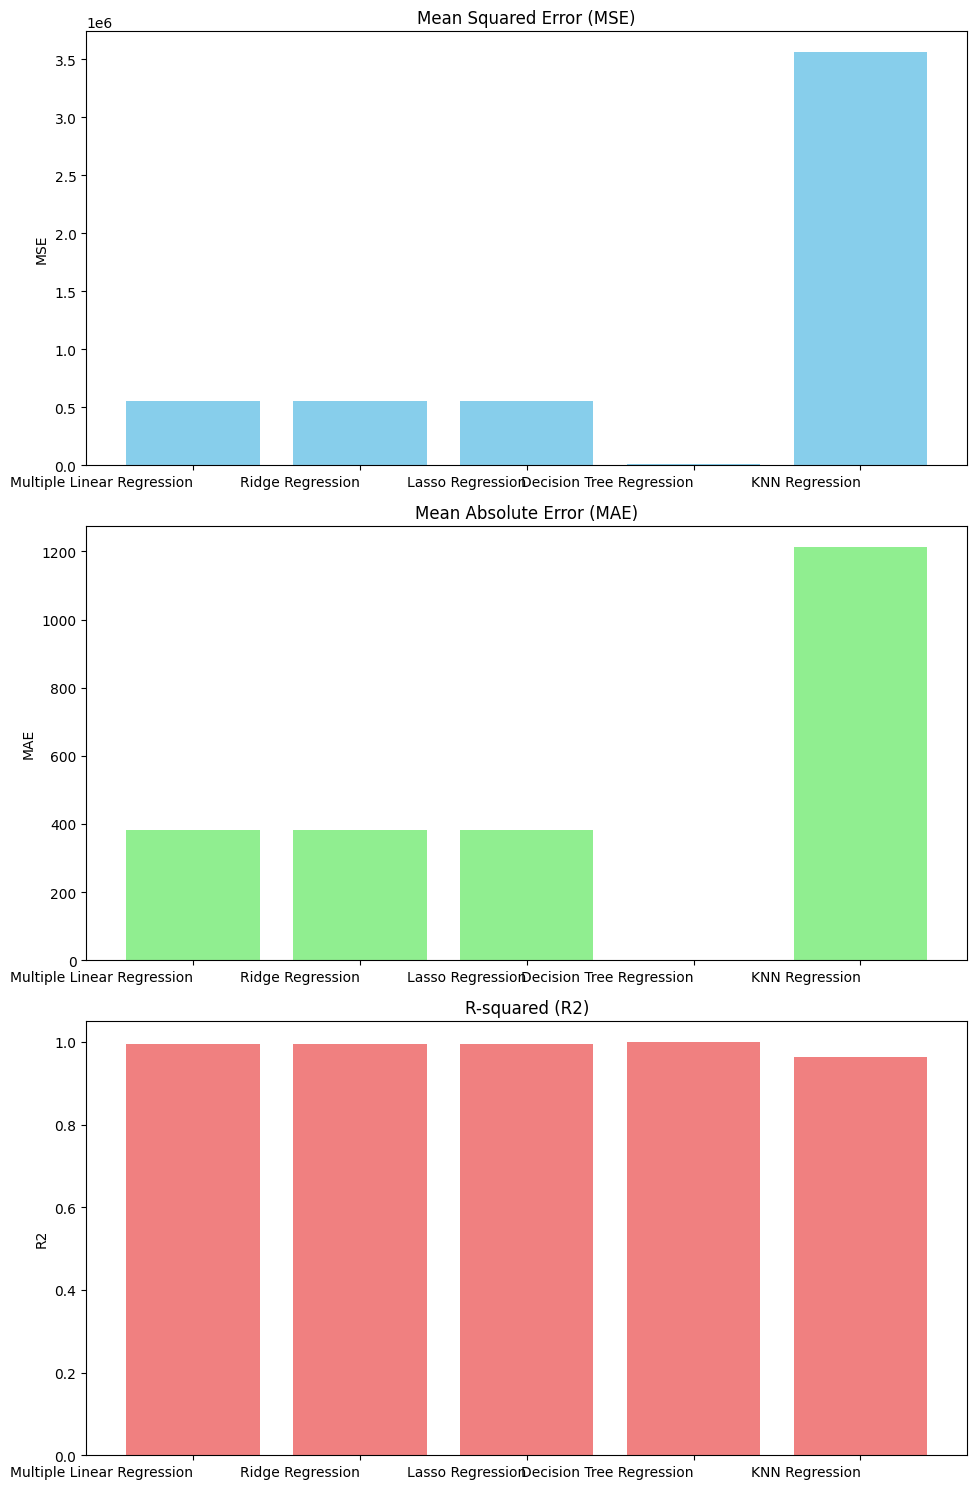

In [105]:
models = list(results.keys())
mse = [results[model]['MSE'] for model in models]
mae = [results[model]['MAE'] for model in models]
r2 = [results[model]['R2'] for model in models]

# Creating subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plotting MSE
axs[0].bar(models, mse, color='skyblue')
axs[0].set_title('Mean Squared Error (MSE)')
axs[0].set_ylabel('MSE')
axs[0].set_xticklabels(models, ha='right')

# Plotting MAE
axs[1].bar(models, mae, color='lightgreen')
axs[1].set_title('Mean Absolute Error (MAE)')
axs[1].set_ylabel('MAE')
axs[1].set_xticklabels(models, ha='right')

# Plotting R2
axs[2].bar(models, r2, color='lightcoral')
axs[2].set_title('R-squared (R2)')
axs[2].set_ylabel('R2')
axs[2].set_xticklabels(models, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()


The formula for computing the Mean Square Error is very similar to the one we use to compute the Mean Absolute Error. This time, however, we square the differences between actual and predicted values for Y.

By squaring the differences, we penalize larger errors more than smaller errors, making it an ideal choice to evaluate models for tasks in which larger errors may lead to undesirable outcomes.

- The closer to 0, the better the model’s performance.

From the printed and the plotted results, it can be seen that the lowest MSE belongs to the Decision Tree algorithm. 

The Mean Absolute Error gives us the average value of the total absolute differences between the predicted values output by the model and the actual values in the dataset.

- Values closer to 0 are considered better.

From the printed and the plotted results, it can be seen that the lowest MAE belongs to the Decision Tree algorithm. 

R-Squared measures the proportion of the total variation in the dependent variable that is captured by the model.

- An R-Squared of 1 indicates that all changes in the dependent variable are completely explained by changes in the independent variable(s). In other words, our model perfectly fits the data.

-  R-Squared of 0% indicates that the dependent variable cannot be predicted from the independent variable(s) at all.

From the printed and the plotted results, it can be seen that the R-squared value is almost the same, yet the Decision tree algorithm is better by a fraction.

## Hyperparameter Optimization

In the cross-validation phase, it was concluded that the best algorithm for supervised learning was the Decision tree algorithm, on the following part of this chapter the chosen algorithm will be enhanced.

### Types of Hyperparameters in Decision Tree

- *max_depth:* max_depth hyperparameter controls the maximum depth to which the decision tree is allowed to grow. When the max_depth is deeper it allows the tree to capture more complex patterns in the training data potentially reducing the training error. However, setting max_depth too high can lead to overfitting where the model memorizes the noise in the training data.

- *min_samples_split:* min_sample_split hyperparameter defines the minimal number of samples that are needed to split a node. It should be noted that the min_samples_split works as a threshold to split a node in a decision tree, if the number of samples in a node is less than min_samples_split, the node will not be split and it will turn into a leaf node.

- *min_samples_leaf:* min_samples_leaf hyperparameter defines the required minimal amount of samples to be present at a leaf node. It acts as a threshold for halting the splitting process and designating a node as a leaf.

### Random Search Optimization

The technique used will be Random Search due to large dataset thus large workload.

In [106]:
from sklearn.model_selection import RandomizedSearchCV

In [107]:
# Define the parameter distribution to sample from
param_dist = {
    'max_depth':  np.arange(1, 21),  # List of values from 1 to 20
    'min_samples_split': np.arange(2, 21),  # List of values from 2 to 20
    'min_samples_leaf': np.arange(1, 21)  # List of values from 1 to 20
}
dtree_reg = DecisionTreeRegressor(random_state=42)

# parallel processing. Set the n_jobs parameter to -1 to use all available cores
random_search = RandomizedSearchCV(dtree_reg, param_distributions=param_dist, 
                                   n_iter=40, cv=5, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

print(f"Best Parameters found by Random Search:")
for param, value in best_params_random.items():
    print(f"  {param}: {value}")

print(f"\nBest Score achieved: {best_score_random:.4f}")

Best Parameters found by Random Search:
  min_samples_split: 7
  min_samples_leaf: 2
  max_depth: 10

Best Score achieved: 0.9999


The model had already have this high of an R-Squared, and with this data it is confirmed and best hypermeters are found for later evaluation.

# Unsupervised Learning

In [108]:
unsuper_df = pd.concat([train_df, test_df])
unsuper_df

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,sellingprice_sqrt,mmr_sqrt,odometer_sqrt
64000,2011,20,297,755,19,0,23,45.00000,25374.0,37,1,8209,20800.0,19000.0,1763,137.840488,144.222051,159.292184
74512,2012,7,690,924,36,0,46,47.00000,38759.0,32,1,5017,17900.0,19000.0,192,137.840488,133.790882,196.873056
207025,2013,35,70,108,37,0,46,36.00000,35179.0,19,1,8239,13450.0,12500.0,252,111.803399,115.974135,187.560657
212615,2008,15,753,1205,36,0,50,33.00000,79716.0,33,1,11004,19550.0,19500.0,3063,139.642400,139.821315,282.340220
114910,2010,31,443,1713,37,0,47,19.00000,44314.0,20,1,8632,8800.0,5700.0,1147,75.498344,93.808315,210.508907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514642,2011,5,530,540,73,0,21,38.00000,71212.0,9,1,4468,9900.0,9700.0,1120,98.488578,99.498744,266.855766
29505,1999,49,172,1308,35,0,43,29.18018,157512.0,22,16,4464,1025.0,1300.0,616,36.055513,32.015621,396.877815
222136,2012,19,671,465,23,0,37,39.00000,50758.0,23,1,6202,11600.0,14500.0,672,120.415946,107.703296,225.295362
418234,2010,10,354,1175,34,0,16,19.00000,84614.0,8,1,8115,8300.0,4700.0,2017,68.556546,91.104336,290.884857


In [109]:
df_dropped = unsuper_df.drop('sellingprice_sqrt', axis=1)
X = df_dropped.values[:, 1:]

## Feature Selection

Feature Selection is the process used to select the input variables that are most important to your Machine Learning task.

### Correlation Matrix

The matrix depicts the correlation between all the possible pairs of values in a table.

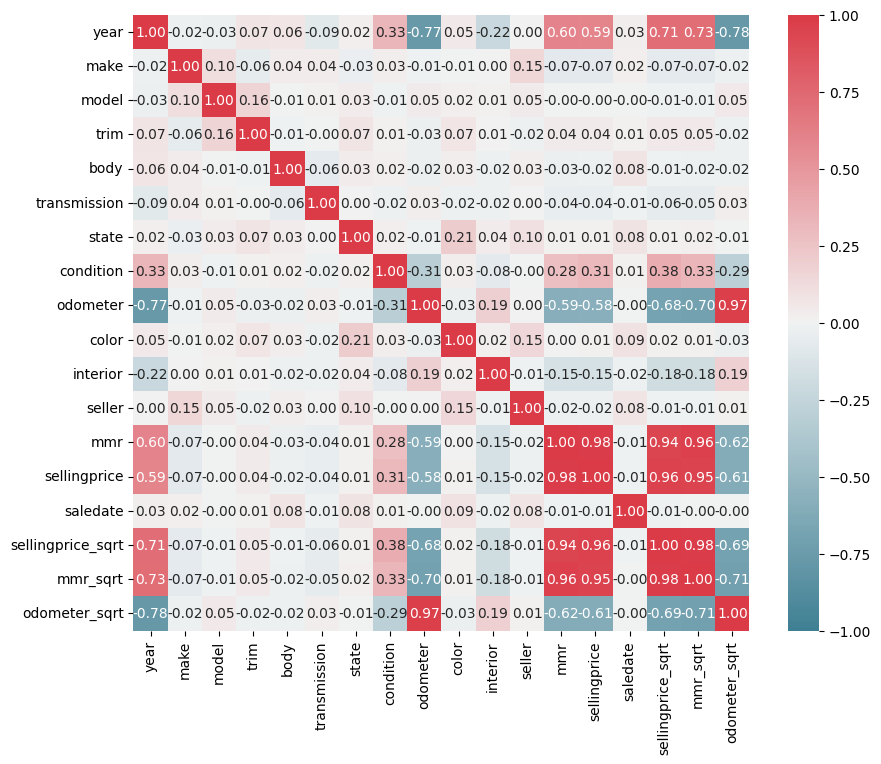

In [110]:
f, ax = plt.subplots(figsize=(10, 8))

# Calculate the correlation matrix
corr = unsuper_df.corr()

sns.heatmap(corr,
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            vmin=-1.0, vmax=1.0,
            square=True, ax=ax,
            annot=True, fmt=".2f")  # annotations 
plt.show()

From the matrix above it is visible that sellingprice_sqrt variable have strong positive correlations with the features, year and mmr_sqrt.

## K-Means Clustering

The algorithm's goal is to divide a dataset into k distinct, non-overlapping subsets or clusters.

In [111]:
from sklearn.cluster import KMeans

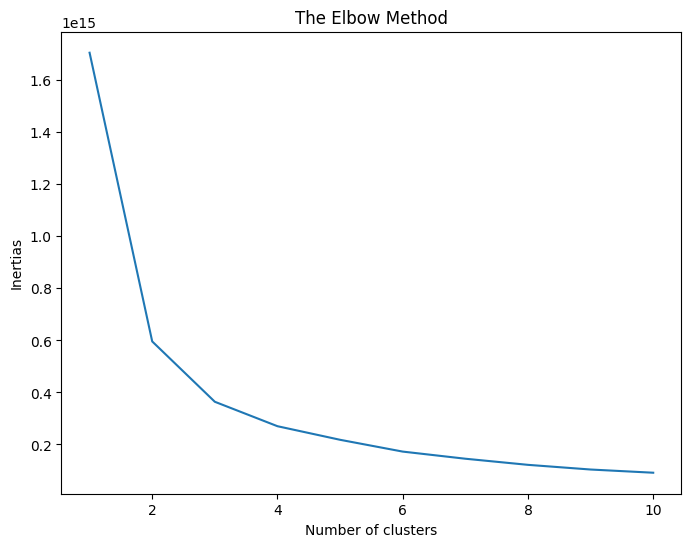

In [112]:
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=12, random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,11),inertias)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertias')
plt.show()

With the elbow method it can be seen that the best amount of clusters is 3.

In [113]:
half_index = len(train_df) // 2
training_points = X[:half_index]
test_points = X[half_index:]

In [114]:
kmeans_model = KMeans(n_clusters=3, random_state=42) 
kmeans_model.fit(training_points)

KMeans(n_clusters=3, random_state=42)

In [115]:
labels_kmeans = kmeans_model.predict(test_points)

The kmeans model uses half of the dataset to train itself and the second half to cluster.

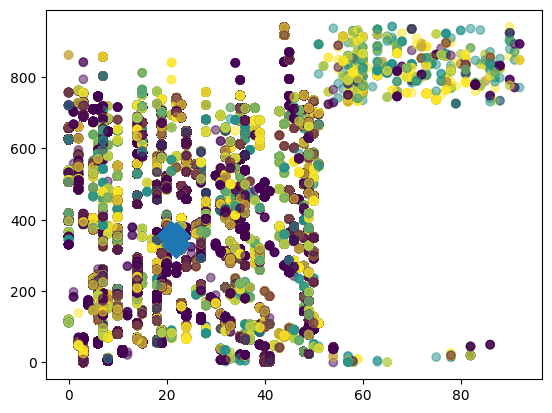

In [116]:
xs = test_points[:,0]
ys = test_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels_kmeans, alpha=0.5)

# Assign the cluster centers: centroids
centroids = kmeans_model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D',s=200)
plt.show()

From the data above it can be seen that the model works quite poorly. It does not have clear centroids or clusters. The clusters are overlapping to the degree that the prediction seems as if the original data distribution.

### PCA

Since the dataset is fairly large, it would be best to perform PCA and reduce dimensionality to avoid excessive computing and also enhance the performance of the kmeans model.

In [117]:
from sklearn.decomposition import PCA

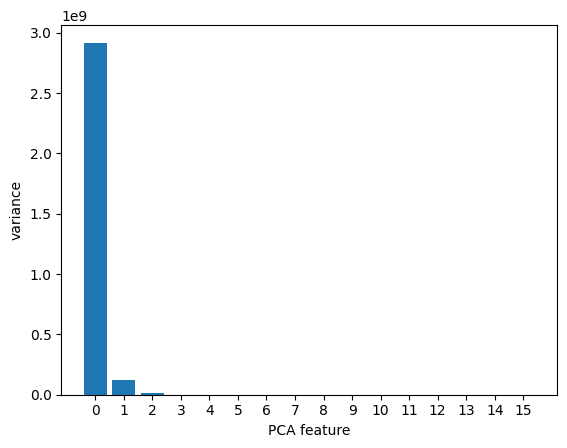

In [118]:
pca = PCA()
pca.fit(X)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

From the plot above it can be seen that the most of the features does not hold valuable information.

In [119]:
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.95604263 0.03923389]
0.9952765201860827


When the feature count is held as two, %99 of the variance can be held.

In [120]:
pca = PCA(n_components=2)
pca.fit(X)
pca_features = pca.transform(X)

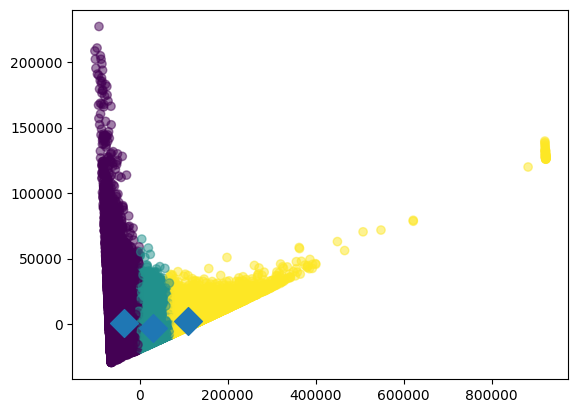

In [121]:
half_index = len(train_df) // 2
training_points = pca_features[:half_index]
test_points = pca_features[half_index:]

kmeans_model = KMeans(n_clusters=3, random_state=42) 
kmeans_model.fit(training_points)

labels_kmeans = kmeans_model.predict(test_points)

xs = test_points[:,0]
ys = test_points[:,1]

plt.scatter(xs, ys, c=labels_kmeans, alpha=0.5)

centroids = kmeans_model.cluster_centers_

centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

plt.scatter(centroids_x, centroids_y, marker='D',s=200)
plt.show()

After using the PCA features, the model has more defined clusters and centroids that are not clashing.

## Evaluation

### Silhouette Score
The silhouette score in machine learning ranges from -1 to 1.

- 1 meaning well-defined clusters.
- -1 meaning the sample might be assigned to the wrong cluster.

In [139]:
print(test_points.shape)

(363239, 2)


Since the dataset is too large, the computation time is excessive, thus I will be using a sample size.

In [140]:
from sklearn.metrics import silhouette_score
from sklearn.utils import resample

In [138]:
# Sample a subset of the test points
sample_size = 100000 
test_points_sample, labels_kmeans_sample = resample(test_points, labels_kmeans, n_samples=sample_size, random_state=42)

# Calculate silhouette score for the sample
score = silhouette_score(test_points_sample, labels_kmeans_sample)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.5579113195179776


Since a silhouette score above 0.5 suggests that the clustering structure is reasonable, it can be said that the model works appropriately.